<a href="https://colab.research.google.com/github/HimalKarkal/NFL/blob/Plays-Analysis/Plays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
df = pd.read_csv('/content/plays.csv')


In [53]:
df.head(10)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN
5,2022103001,2165,54616,Tyler Allgeier,(10:14) (Shotgun) M.Mariota pass short left to...,3,3,17,ATL,CAR,...,0.599479,0.400521,-0.030628,0.030628,-1.484904,-0.639661,NaN,NaN,NaN,NaN
6,2022100207,2933,38538,Ryan Tannehill,(13:31) (Shotgun) R.Tannehill scrambles up the...,4,3,5,TEN,IND,...,0.230881,0.769119,0.027645,-0.027645,0.137272,-1.269624,NaN,NaN,NaN,NaN
7,2022102310,56,46377,Jeffery Wilson,(15:00) J.Wilson left tackle to SF 32 for 7 ya...,1,1,10,SF,KC,...,0.568721,0.431279,0.001382,-0.001382,1.298699,0.282340,NaN,NaN,NaN,NaN
8,2022102310,1318,41325,Jerick McKinnon,(10:31) (Shotgun) J.McKinnon left guard to KC ...,2,1,10,KC,SF,...,0.679606,0.320394,-0.015303,0.015303,1.827773,0.733410,NaN,NaN,NaN,NaN
9,2022092511,2903,46096,Rashaad Penny,(:35) (Shotgun) G.Smith pass short left to R.P...,3,1,10,SEA,ATL,...,0.344336,0.655664,-0.018103,0.018103,0.986438,-0.477845,NaN,NaN,NaN,NaN


In [54]:
#Selecting only the measures I am interested in.

df = df[['quarter', 'down', 'yardsToGo', 'yardlineNumber', 'gameClock', 'passResult', 'passLength',  'offenseFormation', 'defendersInTheBox', 'playResult']]

df.head(10)


,quarter,down,yardsToGo,yardlineNumber,gameClock,passResult,passLength,offenseFormation,defendersInTheBox,playResult
0,4,1,10,41,7:52,C,6.0,SHOTGUN,7.0,9
1,4,1,10,34,7:38,NaN,NaN,SHOTGUN,7.0,3
2,2,2,5,30,8:57,C,11.0,I_FORM,6.0,15
3,3,2,10,37,13:12,NaN,NaN,SINGLEBACK,6.0,7
4,2,1,10,35,8:33,NaN,NaN,I_FORM,7.0,3
5,3,3,17,18,10:14,C,-5.0,SHOTGUN,5.0,5
6,4,3,5,25,13:31,R,NaN,EMPTY,4.0,3
7,1,1,10,25,15:00,NaN,NaN,SINGLEBACK,7.0,7
8,2,1,10,40,10:31,NaN,NaN,SHOTGUN,6.0,9
9,3,1,10,25,0:35,C,-5.0,SHOTGUN,7.0,3


In [55]:
#Converting gameClock values to minutes and storing it as a float.

df['gameClock'] = df['gameClock'].apply(lambda x: (int(x.split(':')[0]) * 60) + int(x.split(':')[1])) / 60
df['gameClock'] = df['gameClock'].apply(lambda x: round(x, 1))
df.head(10)

,quarter,down,yardsToGo,yardlineNumber,gameClock,passResult,passLength,offenseFormation,defendersInTheBox,playResult
0,4,1,10,41,7.9,C,6.0,SHOTGUN,7.0,9
1,4,1,10,34,7.6,NaN,NaN,SHOTGUN,7.0,3
2,2,2,5,30,8.9,C,11.0,I_FORM,6.0,15
3,3,2,10,37,13.2,NaN,NaN,SINGLEBACK,6.0,7
4,2,1,10,35,8.6,NaN,NaN,I_FORM,7.0,3
5,3,3,17,18,10.2,C,-5.0,SHOTGUN,5.0,5
6,4,3,5,25,13.5,R,NaN,EMPTY,4.0,3
7,1,1,10,25,15.0,NaN,NaN,SINGLEBACK,7.0,7
8,2,1,10,40,10.5,NaN,NaN,SHOTGUN,6.0,9
9,3,1,10,25,0.6,C,-5.0,SHOTGUN,7.0,3


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quarter            12486 non-null  int64  
 1   down               12486 non-null  int64  
 2   yardsToGo          12486 non-null  int64  
 3   yardlineNumber     12486 non-null  int64  
 4   gameClock          12486 non-null  float64
 5   passResult         6105 non-null   object 
 6   passLength         5634 non-null   float64
 7   offenseFormation   12482 non-null  object 
 8   defendersInTheBox  12481 non-null  float64
 9   playResult         12486 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 975.6+ KB


In [61]:
#Removing rows with NAs in defendersInTheBox column.

df = df[~df['defendersInTheBox'].isna()]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12481 entries, 0 to 12485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quarter            12481 non-null  int64  
 1   down               12481 non-null  int64  
 2   yardsToGo          12481 non-null  int64  
 3   yardlineNumber     12481 non-null  int64  
 4   gameClock          12481 non-null  float64
 5   passResult         6102 non-null   object 
 6   passLength         5632 non-null   float64
 7   offenseFormation   12481 non-null  object 
 8   defendersInTheBox  12481 non-null  float64
 9   playResult         12481 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.0+ MB


To compare the frequency of passing and running plays, I am creating a new column called 'playType' which can hold one of two values:
0 - Running Play
1 - Passing Play

I will do this by assigning 0 in the playType column for all rows which which a null value in the 'passResult' column.

In [65]:
df['playType'] = df['passResult'].apply(lambda x: 0 if pd.isna(x) else 1)
df.head(5)

,quarter,down,yardsToGo,yardlineNumber,gameClock,passResult,passLength,offenseFormation,defendersInTheBox,playResult,playType
0,4,1,10,41,7.9,C,6.0,SHOTGUN,7.0,9,1
1,4,1,10,34,7.6,NaN,NaN,SHOTGUN,7.0,3,0
2,2,2,5,30,8.9,C,11.0,I_FORM,6.0,15,1
3,3,2,10,37,13.2,NaN,NaN,SINGLEBACK,6.0,7,0
4,2,1,10,35,8.6,NaN,NaN,I_FORM,7.0,3,0


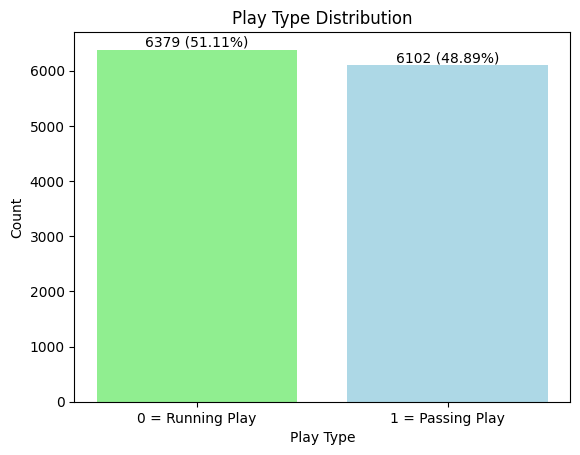

In [79]:
play_type_counts = df['playType'].value_counts()

labels = ['0 = Running Play', '1 = Passing Play']
colors = ['lightgreen', 'lightblue']

plt.bar(labels, play_type_counts, color=colors)
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.title('Play Type Distribution')

for i, value in enumerate(play_type_counts):
  plt.text(i, value, f'{value:.0f} ({(value / df.shape[0]) * 100:.2f}%)', ha='center', va='bottom')

plt.show()


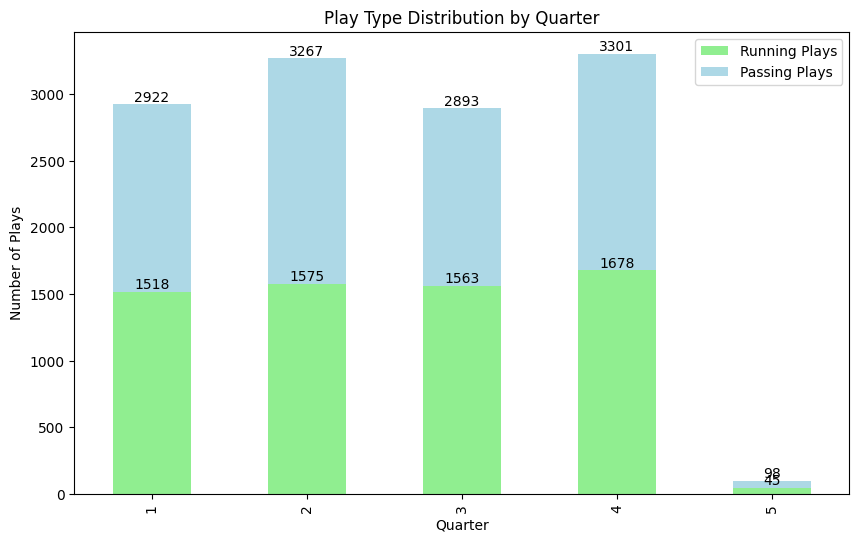

In [128]:
play_type_by_quarter = df.groupby(['quarter', 'playType']).size().unstack().fillna(0)

labels = ['Running Plays', 'Passing Plays']

play_type_by_quarter.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Play Type Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Plays')
plt.legend(labels=labels)

plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])

plt.show()


The two bar graphs show that frequency of running and passing plays in NFL are virtually equal and this does not change much by quarter.